# Technical Analysis
CodeIT Suisse 2019

## Problem Statement

Use the first 100 points of a stock price as **training data** to recommend buy and sell trades for the next 1,000 points of **test data**.

Due to a bug, training data values are *truncated* to integers.

On a bright side, you know the family of functions which the price follows:

\begin{equation}
price = base + trend * t + \sum_{i=1}^{sine\_count} scale_i * \sin(2\pi * period\_count_i * t)
\end{equation}
Where
\begin{align*}
\\&t \in [0, 1] evenly\ spaced\ corresponding\ to\ points [0, 1099]
\\&base \in [200, 300)
\\&trend \in [-100, 100)
\\&scale_i \in [5, 15)
\\&period\_count_i \in [10, 100)
\\&sine\_count - see\ below
\end{align*}

### Scoring
Input data contains 4 scenarios in this order:

| Scenario | sine_count | weight |
|-|-|-|
| 1 | 1 | 0.1 |
| 2 | 2 | 0.2 |
| 3 | 3 | 0.3 |
| 4 | 4 | 0.4 |

Assuming the initial amount of cash is 1, scenario score is:
\begin{equation}
score_i = \dfrac{final\_amount_i - 1}{max\_final\_amount_i - 1}
\end{equation}

where

**final_amount** - final amount of cash after trading following your recommendations

**max_final_amount** - final amount of cash after trading following strategy "buy low, sell high"

Total score is a weighted sum of the scenario scores:
\begin{align}
total\_coorinator\_score = 100 * \sum_{i=1}^{scenario\_count} weight_i * score_i
\end{align}

### Input
4 lists, each containing first 100 price values for training.

#### Sample Input

In [38]:
import pprint
import matplotlib.pyplot as plt
import numpy as np
from app import generation, trade_optimizer, evaluate

def format_numerable(word, count):
    pluralized = word if count == 1 else word + "s"
    return f"{count} {pluralized}"

scenarios = generation.get_standard_scenarios(1)
pprint.pprint(evaluate.create_challenge_input(scenarios), width=106, compact=True)

[[283, 285, 287, 288, 290, 291, 291, 291, 290, 289, 287, 285, 283, 280, 278, 276, 275, 273, 273, 273, 273,
  274, 276, 277, 279, 282, 284, 286, 287, 289, 289, 290, 289, 288, 287, 285, 283, 281, 279, 276, 275, 273,
  272, 271, 271, 272, 273, 275, 277, 279, 281, 283, 285, 286, 288, 288, 288, 288, 287, 285, 283, 281, 279,
  277, 275, 273, 271, 270, 270, 270, 271, 272, 274, 276, 278, 280, 282, 284, 285, 286, 287, 287, 286, 285,
  284, 282, 279, 277, 275, 273, 271, 270, 269, 269, 269, 270, 271, 273, 275, 277],
 [268, 273, 277, 280, 281, 280, 277, 273, 268, 264, 261, 259, 259, 261, 263, 266, 269, 271, 271, 270, 268,
  265, 262, 260, 259, 259, 261, 265, 269, 274, 278, 280, 280, 278, 275, 270, 264, 259, 255, 253, 253, 255,
  258, 262, 267, 271, 273, 274, 274, 272, 269, 266, 263, 262, 262, 264, 266, 269, 272, 274, 274, 273, 270,
  266, 261, 257, 253, 252, 252, 255, 259, 264, 270, 274, 278, 279, 278, 276, 272, 267, 263, 259, 257, 257,
  258, 261, 263, 266, 268, 269, 268, 266, 263, 260, 258, 257,

### Output
List of trade recommendations for each input scenario.

Each trade recommendation is a sequence of alternating buy-sell indexes. It should be monotonically increasing with each index within [100, 1100)

Buy converts all cash to stock, sell converts all stock to cash.

If the last recommended trade is a buy, sell will be implied at the point 1099.


#### Sample Output

In [37]:
optimal_trades = [list(trade_optimizer.get_optimal_trades(s.test_signal)) for s in scenarios]
pprint.pprint(optimal_trades, width=120, compact=True)

[[0, 5, 18, 30, 43, 55, 67, 80, 92, 104, 117, 129, 142, 154, 166, 179, 191, 203, 216, 228, 241, 253, 266, 278, 290, 303,
  315, 327, 340, 352, 365, 377, 389, 402, 414, 426, 439, 451, 464, 476, 489, 501, 513, 525, 538, 550, 563, 575, 588,
  600, 612, 625, 637, 649, 662, 674, 687, 699, 711, 724, 736, 748, 761, 773, 786, 798, 811, 823, 835, 848, 860, 872,
  885, 897, 910, 922, 934, 947, 959, 971, 984, 996],
 [0, 3, 11, 18, 25, 31, 38, 46, 54, 60, 67, 74, 82, 89, 96, 102, 110, 118, 125, 131, 138, 145, 153, 161, 167, 173, 181,
  189, 196, 203, 209, 216, 224, 232, 238, 245, 252, 260, 267, 274, 280, 288, 296, 303, 309, 316, 323, 331, 339, 345,
  351, 359, 367, 374, 381, 387, 394, 402, 410, 416, 423, 430, 438, 445, 452, 458, 466, 474, 481, 487, 494, 501, 509,
  517, 523, 529, 537, 545, 552, 559, 565, 572, 580, 588, 594, 600, 608, 616, 623, 630, 636, 644, 652, 659, 665, 672,
  679, 687, 695, 701, 707, 715, 723, 730, 737, 743, 750, 758, 766, 772, 779, 786, 794, 801, 808, 814, 822, 829, 837,
  84

### Visualization
**<font color='blue'>Blue</font>** - training data<br/>
**<font color='orange'>Orange</font>** - test data

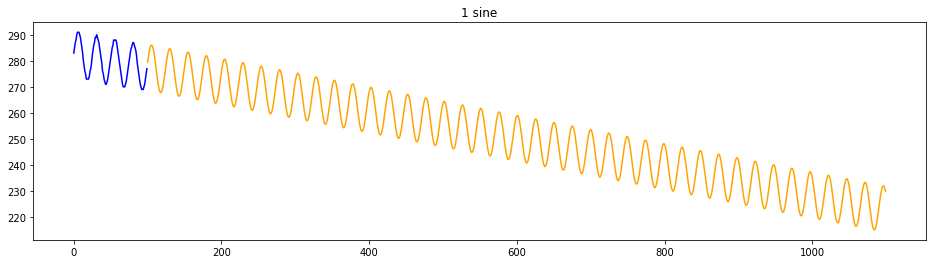

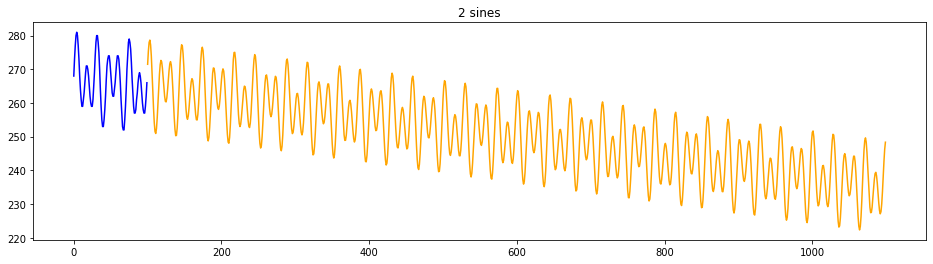

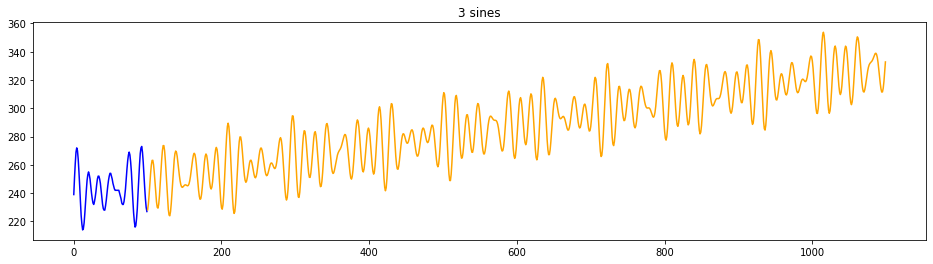

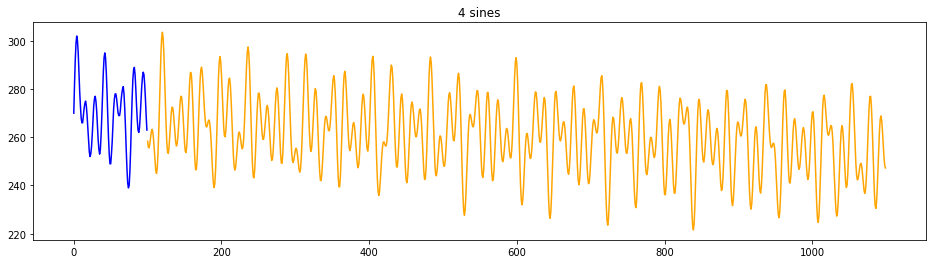

In [28]:
for scenario in scenarios:
    fig = plt.figure()
    fig.set_size_inches(16, 4)
    plt.title(format_numerable("sine", scenario.sine_count))
    plt.plot(np.arange(scenario.train_size), scenario.train_signal, color='blue')
    plt.plot(scenario.train_size + np.arange(scenario.test_size), scenario.test_signal, color='orange')